In [1]:
import cv2
from matplotlib import pyplot as plt
from helper import *
from scipy import spatial

In [2]:
def calculate_embeddings(filename):
    
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    
    embedder = Runner(filename=filename)
    
    face_location, crops = embedder.detect_face(img)
    print("Number of Faces detected:", len(face_location))
    
    img_draw = draw_rectangle(img, face_location)
    
    emb = embedder.embeddings(crops)
    
    return img_draw, emb

In [12]:
img, emb = calculate_embeddings("/Users/arpitsharma/Downloads/TBT/TBT 2023-1185.jpg")

1/1 [==============================] - 0s 13ms/step
Number of Faces detected: 1
1/1 [==============================] - 1s 703ms/step


In [13]:
img1, emb1 = calculate_embeddings("/Users/arpitsharma/Downloads/TBT/TBT 2023-1184.jpg")

2/2 [==============================] - 0s 3ms/step
Number of Faces detected: 1
1/1 [==============================] - 1s 523ms/step


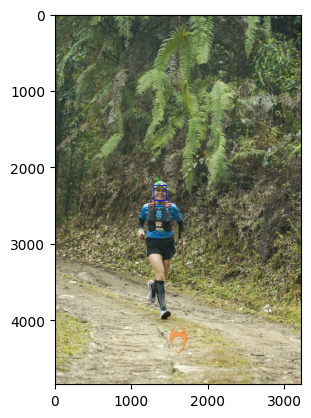

In [14]:
plt.imshow(img)

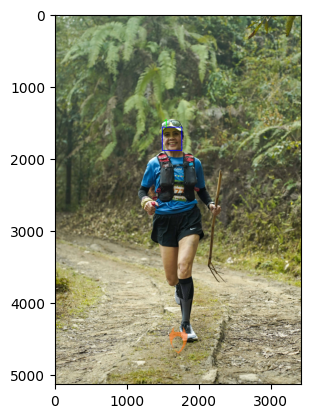

In [15]:
plt.imshow(img1)

In [16]:
spatial.distance.cosine(emb[0], emb1[0])

0.1306045651435852

In [1]:
import numpy as np

In [18]:
a = np.array([[1, 2, 3, 3], [2, 3, 4, 5]])

In [43]:
vec = {'a': np.array([1, 2, 3, 3]), 'b': np.array([2, 3, 4, 5])}

In [44]:
vec

{'a': array([1, 2, 3, 3]), 'b': array([2, 3, 4, 5])}

In [47]:
np.mean(np.array(list(vec.values())), axis=0)

array([1.5, 2.5, 3.5, 4. ])

In [36]:
emb.shape

(1, 512)

In [42]:
np.array(list(vec.values())).reshape(2, 4)

array([[1, 2, 3, 3],
       [2, 3, 4, 5]])